In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential, load_model
# from tensorflow.keras.layers import LSTM, Dense, Input

#### Đọc dữ liệu từ 5 tập đoàn

In [2]:
vnm = pd.read_csv("/kaggle/input/vnm-10y/D-liu-Lch-s-VNM-1.csv", parse_dates=['Ngày'], dayfirst=True, thousands=',', decimal='.')
vnm

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,2025-04-23,56400.0,56800.0,57200.0,56200.0,3.59M,0.71%
1,2025-04-22,56000.0,56600.0,56600.0,53900.0,6.96M,-1.23%
2,2025-04-21,56700.0,56800.0,57100.0,56500.0,3.02M,0.18%
3,2025-04-18,56600.0,56700.0,57300.0,56600.0,3.04M,1.07%
4,2025-04-17,56000.0,55500.0,56600.0,54800.0,7.22M,0.00%
...,...,...,...,...,...,...,...
2937,2013-07-16,96528.0,95139.0,97222.0,95139.0,729.69K,1.46%
2938,2013-07-15,95139.0,95139.0,95833.0,94444.0,176.98K,0.00%
2939,2013-07-12,95139.0,94444.0,95139.0,93750.0,220.82K,0.74%
2940,2013-07-11,94444.0,94444.0,95139.0,93750.0,161.84K,0.00%


In [3]:
hag = pd.read_csv("/kaggle/input/bombardinocrocodilo/Hoang-Anh-Gia-Lai-JSC-Stock-Price-History.csv", parse_dates=['Date'], dayfirst=False, thousands=',', decimal='.')
hag

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-12-31,12050.0,12250.0,12300.0,11900.0,7.39M,0.42%
1,2024-12-30,12000.0,12000.0,12150.0,11750.0,5.96M,0.00%
2,2024-12-27,12000.0,12500.0,12600.0,11950.0,15.72M,-4.00%
3,2024-12-26,12500.0,12550.0,12650.0,12500.0,4.40M,0.00%
4,2024-12-25,12500.0,12750.0,12850.0,12500.0,5.67M,-1.96%
...,...,...,...,...,...,...,...
2989,2013-01-08,20962.0,20312.0,20962.0,20068.0,3.03M,4.88%
2990,2013-01-07,19987.0,19093.0,19987.0,19093.0,3.36M,4.68%
2991,2013-01-04,19093.0,18281.0,19256.0,18118.0,1.92M,3.98%
2992,2013-01-03,18362.0,18118.0,18524.0,17712.0,1.10M,1.35%


In [4]:
hpg = pd.read_csv("/kaggle/input/bombardinocrocodilo/Hoa-Phat-Group-JSC-Stock-Price-History.csv", parse_dates=['Date'], dayfirst=False, thousands=',', decimal='.')
hpg

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-12-31,26650.0,26750.0,26750.0,26600.0,10.25M,-0.37%
1,2024-12-30,26750.0,26800.0,26850.0,26650.0,12.17M,-0.37%
2,2024-12-27,26850.0,27000.0,27000.0,26800.0,11.39M,-0.56%
3,2024-12-26,27000.0,27150.0,27200.0,26850.0,9.98M,-0.55%
4,2024-12-25,27150.0,26750.0,27150.0,26750.0,17.14M,1.69%
...,...,...,...,...,...,...,...
2989,2013-01-08,1700.5,1693.4,1707.5,1672.3,18.03M,4.33%
2990,2013-01-07,1629.9,1495.9,1629.9,1495.9,11.28M,5.00%
2991,2013-01-04,1552.3,1510.0,1573.5,1495.9,6.94M,3.29%
2992,2013-01-03,1502.9,1481.7,1502.9,1467.6,8.77M,0.95%


In [5]:
mbb = pd.read_csv("/kaggle/input/bombardinocrocodilo/Military-Commercial-Bank-Stock-Price-History.csv", parse_dates=['Date'], dayfirst=False, thousands=',', decimal='.')
mbb

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-12-31,21826.0,21565.0,21826.0,21565.0,12.93M,1.21%
1,2024-12-30,21565.0,21870.0,21870.0,21565.0,12.72M,-1.00%
2,2024-12-27,21783.0,21783.0,22000.0,21739.0,19.21M,0.61%
3,2024-12-26,21652.0,21304.0,21652.0,21261.0,22.89M,1.84%
4,2024-12-25,21261.0,20826.0,21565.0,20826.0,17.04M,2.30%
...,...,...,...,...,...,...,...
2989,2013-01-08,3769.4,3603.1,3797.1,3603.1,15.27M,3.82%
2990,2013-01-07,3630.8,3603.1,3658.5,3575.4,4.67M,0.77%
2991,2013-01-04,3603.1,3575.4,3630.8,3519.9,4.02M,0.77%
2992,2013-01-03,3575.4,3658.5,3658.5,3519.9,5.80M,-1.53%


In [6]:
fpt = pd.read_csv("/kaggle/input/bombardinocrocodilo/FPT-Corp-Stock-Price-History.csv", parse_dates=['Date'], dayfirst=False, thousands=',', decimal='.')
fpt

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-12-31,152500.0,150700.0,153900.0,150300.0,3.60M,1.33%
1,2024-12-30,150500.0,149400.0,150800.0,148500.0,1.98M,0.60%
2,2024-12-27,149600.0,149500.0,149900.0,148700.0,2.56M,-0.13%
3,2024-12-26,149800.0,151000.0,151400.0,149100.0,2.23M,-0.66%
4,2024-12-25,150800.0,150600.0,151200.0,150400.0,2.51M,0.27%
...,...,...,...,...,...,...,...
2989,2013-01-08,7044.1,6728.9,7044.1,6710.4,2.05M,4.97%
2990,2013-01-07,6710.4,6710.4,6766.0,6673.3,780.75K,-0.55%
2991,2013-01-04,6747.5,6617.7,6747.5,6599.2,1.06M,1.39%
2992,2013-01-03,6654.8,6747.5,6784.5,6543.6,1.40M,-1.37%


Đổi lại tên các cột trong bảng vnm sang tiếng Anh + chuyển đổi đơn vị

In [7]:
# Đổi tên các cột thành tiếng Anh cho dễ làm việc
vnm.rename(columns={
    "Ngày": "Date",
    "Lần cuối": "Price",
    "Mở": "Open",
    "Cao": "High",
    "Thấp": "Low",
    "KL": "Vol.",
    "% Thay đổi": "Change %",
}, inplace = True)
vnm

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-04-23,56400.0,56800.0,57200.0,56200.0,3.59M,0.71%
1,2025-04-22,56000.0,56600.0,56600.0,53900.0,6.96M,-1.23%
2,2025-04-21,56700.0,56800.0,57100.0,56500.0,3.02M,0.18%
3,2025-04-18,56600.0,56700.0,57300.0,56600.0,3.04M,1.07%
4,2025-04-17,56000.0,55500.0,56600.0,54800.0,7.22M,0.00%
...,...,...,...,...,...,...,...
2937,2013-07-16,96528.0,95139.0,97222.0,95139.0,729.69K,1.46%
2938,2013-07-15,95139.0,95139.0,95833.0,94444.0,176.98K,0.00%
2939,2013-07-12,95139.0,94444.0,95139.0,93750.0,220.82K,0.74%
2940,2013-07-11,94444.0,94444.0,95139.0,93750.0,161.84K,0.00%


In [8]:
#convert M L K trong cột KL thành số thực
def convert_volume(vol_str):
    if isinstance(vol_str, str):
        if vol_str[-1] == 'M':
            return float(vol_str[:-1]) * 1_000_000
        elif vol_str[-1] == 'K':
            return float(vol_str[:-1]) * 1_000
    return float(vol_str)

for deiter in [vnm, hag, hpg, fpt, mbb]:
    deiter['Vol.'] = deiter['Vol.'].apply(convert_volume)
    deiter = deiter.sort_values('Date')
    deiter = deiter.ffill()

In [9]:
for deiter in [vnm, hag, hpg, fpt, mbb]:
    deiter['DayOfWeek'] = deiter['Date'].dt.dayofweek

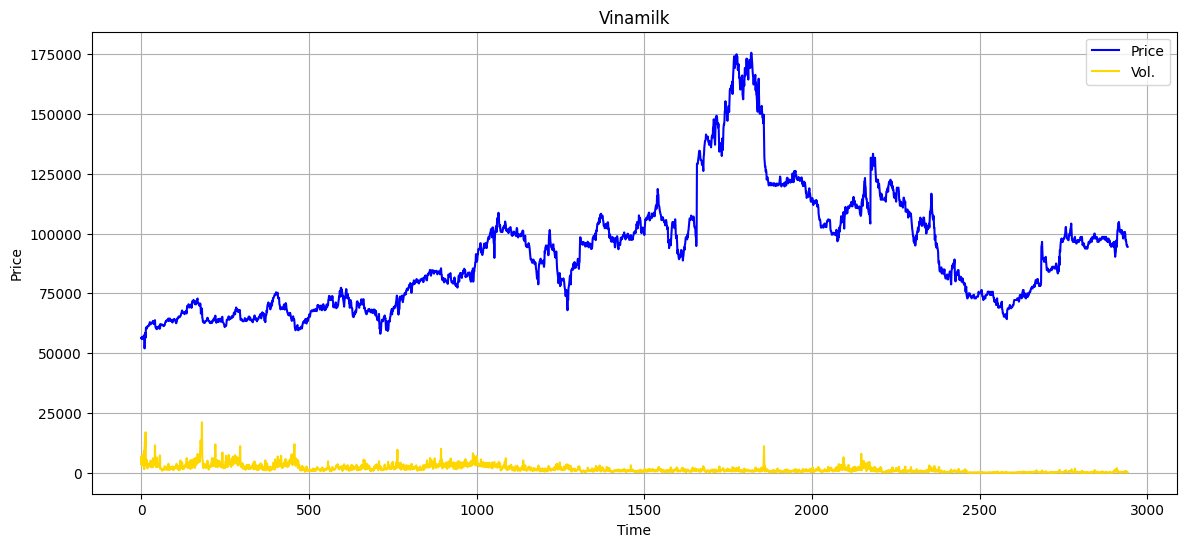

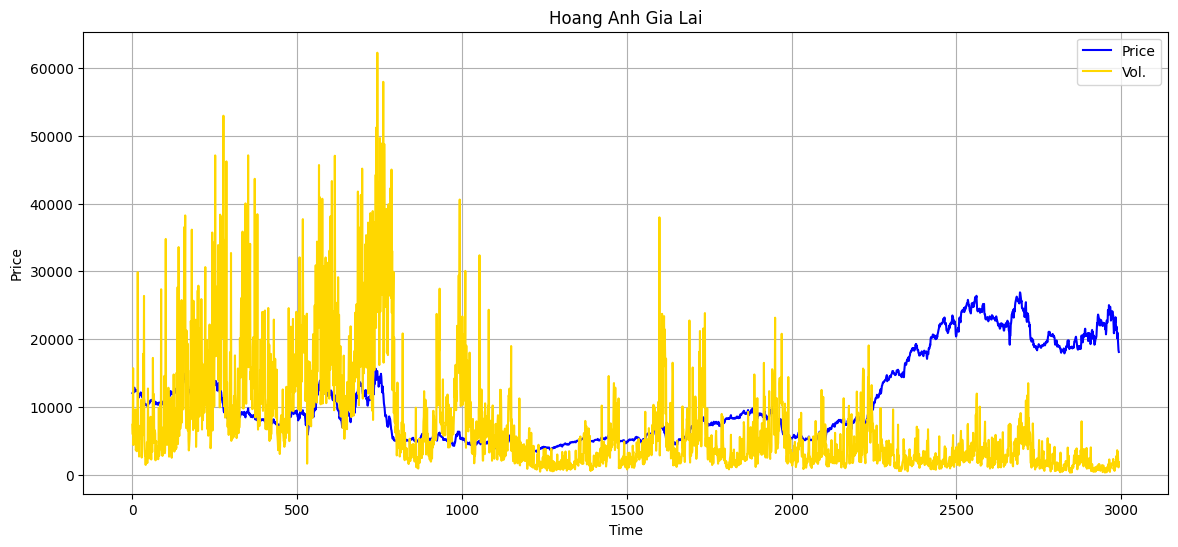

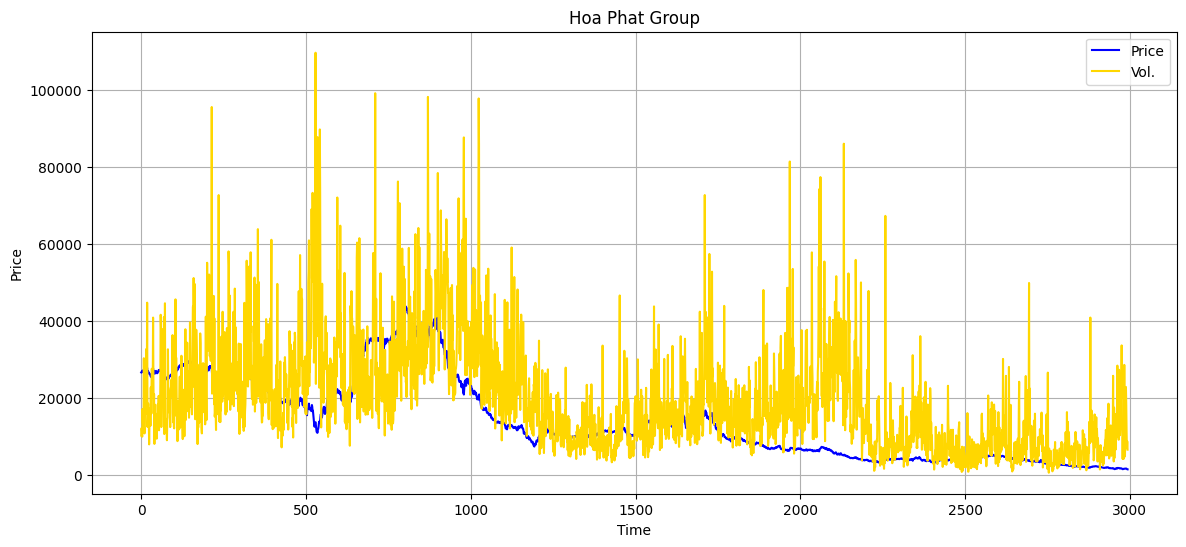

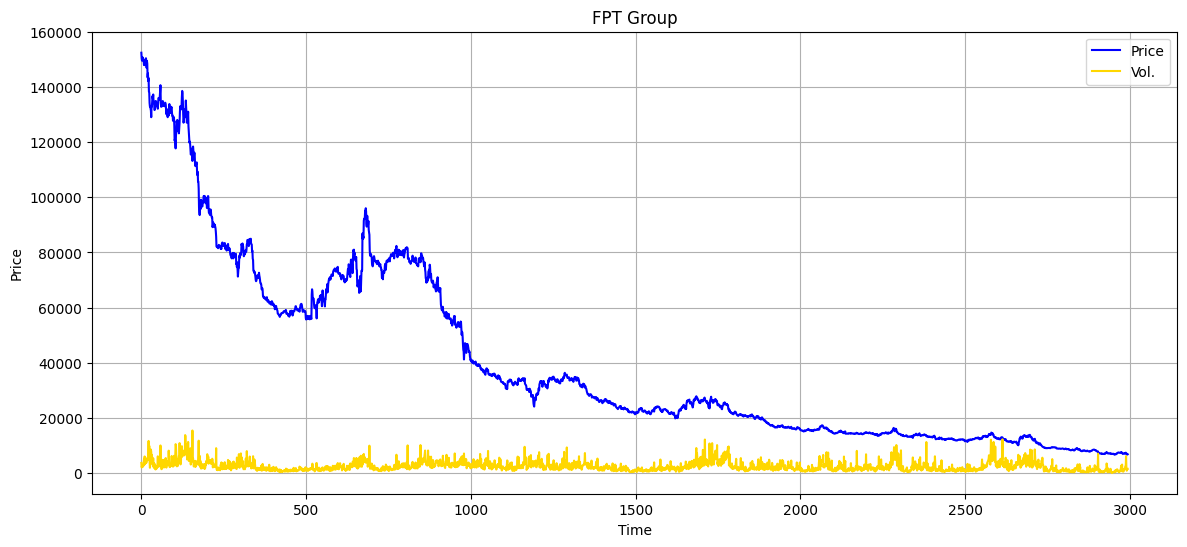

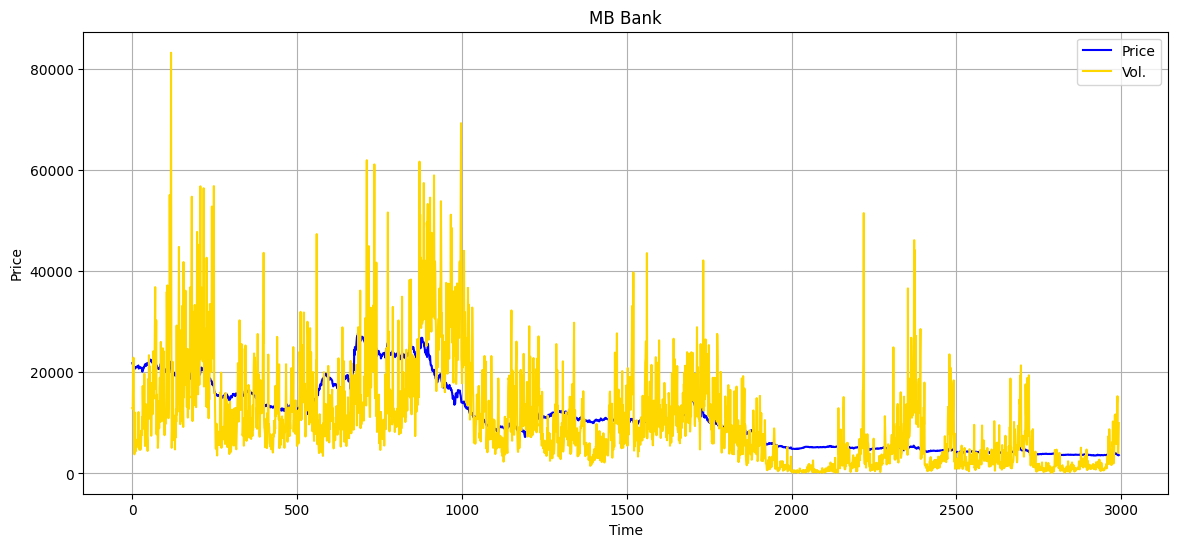

In [10]:
names_and_datas = [("Vinamilk", vnm), ("Hoang Anh Gia Lai", hag), ("Hoa Phat Group", hpg),
                    ("FPT Group", fpt), ("MB Bank", mbb)]

for neim, deiter in names_and_datas:
    plt.figure(figsize=(14,6))
    plt.plot(deiter['Price'].values, label='Price', color='blue')
    plt.plot(deiter['Vol.'].values/1000, label='Vol.', color='gold')
    plt.legend()
    plt.title(f'{neim}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

các hàm hỗ trợ

In [11]:
def add_target_columns(df):
    df['Target_5'] = df['Price'].shift(-5)
    df['Target_10'] = df['Price'].shift(-10)
    df['Target_20'] = df['Price'].shift(-20)
    # df['Target_50'] = df['Price'].shift(-50)
    # df['Target_100'] = df['Price'].shift(-100)

In [12]:
def add_features(df):
    #%chênh giá mở và đóng, chênh giá đỉnh và sàn
    df['Daily_Return'] = (df['Price'] - df['Open']) / df['Open']
    df['High_Low_Spread'] = (df['High'] - df['Low']) / df['Open']

    #xem xu hướng của giá cổ phiếu dựa trên trung bình 15, 10 và 20 ngày gần nhất
    df['MA5'] = df['Price'].rolling(window=5).mean()
    df['MA10'] = df['Price'].rolling(window=10).mean()
    df['MA20'] = df['Price'].rolling(window=20).mean()

    #xem độ biến động thông qua độ lệch chuẩn của giá 5 ngày
    df['Volatility_5'] = df['Price'].rolling(window=5).std()
    df['Volume_MA5'] = df['Vol.'].rolling(window=5).mean()
    df['Volume_Spike'] = (df['Vol.'] > 1.5 * df['Vol.'].rolling(window=20).mean()).astype(int)

In [13]:
for deiter in [vnm, hag, hpg, fpt, mbb]:
    add_features(deiter)
    add_target_columns(deiter)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [14]:
vnm

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Price,Open,High,Low,Vol.,Change %,DayOfWeek,Daily_Return,High_Low_Spread,MA5,MA10,MA20,Volatility_5,Volume_MA5,Volume_Spike,Target_5,Target_10,Target_20
0,2025-04-23,56400.0,56800.0,57200.0,56200.0,3590000.0,0.71%,2,-0.007042,0.017606,NaN,NaN,NaN,NaN,NaN,0,56000.0,52000.0,61400.0
1,2025-04-22,56000.0,56600.0,56600.0,53900.0,6960000.0,-1.23%,1,-0.010601,0.047703,NaN,NaN,NaN,NaN,NaN,0,56300.0,54500.0,61400.0
2,2025-04-21,56700.0,56800.0,57100.0,56500.0,3020000.0,0.18%,0,-0.001761,0.010563,NaN,NaN,NaN,NaN,NaN,0,56900.0,58500.0,61300.0
3,2025-04-18,56600.0,56700.0,57300.0,56600.0,3040000.0,1.07%,4,-0.001764,0.012346,NaN,NaN,NaN,NaN,NaN,0,57500.0,56500.0,61800.0
4,2025-04-17,56000.0,55500.0,56600.0,54800.0,7220000.0,0.00%,3,0.009009,0.032432,56340.0,NaN,NaN,328.633535,4766000.0,0,55600.0,60500.0,62300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,2013-07-16,96528.0,95139.0,97222.0,95139.0,729690.0,1.46%,1,0.014600,0.021894,98333.2,98819.3,99687.30,1876.158096,456842.0,1,NaN,NaN,NaN
2938,2013-07-15,95139.0,95139.0,95833.0,94444.0,176980.0,0.00%,0,0.000000,0.014600,97222.2,98541.5,99409.55,1770.438420,431874.0,0,NaN,NaN,NaN
2939,2013-07-12,95139.0,94444.0,95139.0,93750.0,220820.0,0.74%,4,0.007359,0.014707,96250.0,98055.4,99131.80,1053.030626,354436.0,0,NaN,NaN,NaN
2940,2013-07-11,94444.0,94444.0,95139.0,93750.0,161840.0,0.00%,3,0.000000,0.014707,95694.4,97569.3,98819.30,1141.149552,328666.0,0,NaN,NaN,NaN


# Dùng RandomForest

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from xgboost import XGBRegressor

2025-05-08 18:39:54.643648: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746729594.839503      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746729594.892024      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
def prepare_data_for_predicting_n_days_ahead(tbl, n: str):
    if (n != '5' and n != '10' and  n != '20'):
        return 0
        
    X_cols = ['Daily_Return', 'High_Low_Spread', 'MA5', 'MA10', 
        'MA20', 'Volatility_5', 'Volume_MA5', 'Volume_Spike', 'DayOfWeek']
    y_col = ['Target_' + n]
    needed_cols = X_cols + y_col

    bombardino_crocodilo = tbl[needed_cols].dropna()
    X = bombardino_crocodilo[X_cols]
    y = bombardino_crocodilo[y_col]

    split_point = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
    y_train, y_test = y.iloc[:split_point], y.iloc[split_point:] 
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test

### Helper Functions

In [17]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
model_rfr = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error', n_iter=10)

In [18]:
def train(X_train, X_test, y_train, y_test, model):
    
    model.fit(X_train, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return y_pred

In [19]:
def plot_the_diff(y_test, y_pred, n: str, name: str):
    if (n != '5' and n != '10' and  n != '20'):
        return 0
    plt.figure(figsize=(14,6))
    plt.plot(y_test.values, label='Actual Price', color='blue')
    plt.plot(y_pred, label='Predicted Price', color='red')
    plt.legend()
    plt.title(f'{name}: Actual vs Predicted Prices ({n} days)')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

In [20]:
def bombardino(df: pd.DataFrame, name: str, model):
    for n in ['5', '10', '20']:
        X_train, X_test, y_train, y_test = prepare_data_for_predicting_n_days_ahead(df, n)
        y_pred = train(X_train, X_test, y_train, y_test, model)
        plot_the_diff(y_test, y_pred, name, n)

## Vinamilk

In [21]:
bombardino(vnm, 'Vinamilk', model_rfr)

(2334, 9) (584, 9) (2334, 1) (584, 1)
Mean Squared Error (MSE): 13399189.48
R^2 Score: 0.89
(2330, 9) (583, 9) (2330, 1) (583, 1)
Mean Squared Error (MSE): 28230116.84
R^2 Score: 0.77
(2322, 9) (581, 9) (2322, 1) (581, 1)
Mean Squared Error (MSE): 50422949.97
R^2 Score: 0.59


## Hoang Anh Gia Lai

In [22]:
bombardino(hag, 'Hoang Anh Gia Lai', model_rfr)

(2376, 9) (594, 9) (2376, 1) (594, 1)
Mean Squared Error (MSE): 18914447.36
R^2 Score: -2.80
(2372, 9) (593, 9) (2372, 1) (593, 1)
Mean Squared Error (MSE): 18748776.58
R^2 Score: -2.78
(2364, 9) (591, 9) (2364, 1) (591, 1)
Mean Squared Error (MSE): 19718248.09
R^2 Score: -3.00


## Hoa Phat Group

In [23]:
bombardino(hpg, 'Hoa Phat Group', model_rfr)

(2376, 9) (594, 9) (2376, 1) (594, 1)
Mean Squared Error (MSE): 1087032.67
R^2 Score: 0.14
(2372, 9) (593, 9) (2372, 1) (593, 1)
Mean Squared Error (MSE): 1230802.65
R^2 Score: 0.03
(2364, 9) (591, 9) (2364, 1) (591, 1)
Mean Squared Error (MSE): 1394523.01
R^2 Score: -0.10


## FPT Group

In [24]:
bombardino(fpt, 'FPT Group', model_rfr)

(2376, 9) (594, 9) (2376, 1) (594, 1)
Mean Squared Error (MSE): 13806900.95
R^2 Score: -1.68
(2372, 9) (593, 9) (2372, 1) (593, 1)
Mean Squared Error (MSE): 15938434.66
R^2 Score: -2.10
(2364, 9) (591, 9) (2364, 1) (591, 1)
Mean Squared Error (MSE): 17003175.14
R^2 Score: -2.31


## MB Bank

In [25]:
bombardino(mbb, 'MB Bank', model_rfr)

(2376, 9) (594, 9) (2376, 1) (594, 1)
Mean Squared Error (MSE): 894626.91
R^2 Score: -6.24
(2372, 9) (593, 9) (2372, 1) (593, 1)
Mean Squared Error (MSE): 955315.70
R^2 Score: -6.75
(2364, 9) (591, 9) (2364, 1) (591, 1)
Mean Squared Error (MSE): 1012154.56
R^2 Score: -7.24


# Dùng XGBoost 

In [26]:
param_grid_x = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0]
}
model_xgbr = RandomizedSearchCV(XGBRegressor(), param_grid_x, cv=3, scoring='neg_mean_squared_error', n_iter=10)

## Vinamilk

In [27]:
bombardino(vnm, 'Vinamilk', model_xgbr)

(2334, 9) (584, 9) (2334, 1) (584, 1)
Mean Squared Error (MSE): 14044252.33
R^2 Score: 0.89
(2330, 9) (583, 9) (2330, 1) (583, 1)
Mean Squared Error (MSE): 28764624.51
R^2 Score: 0.77
(2322, 9) (581, 9) (2322, 1) (581, 1)
Mean Squared Error (MSE): 49537634.77
R^2 Score: 0.59


## Hoang Anh Gia Lai

In [28]:
bombardino(hag, 'Hoang Anh Gia Lai', model_xgbr)

(2376, 9) (594, 9) (2376, 1) (594, 1)
Mean Squared Error (MSE): 16178520.24
R^2 Score: -2.25
(2372, 9) (593, 9) (2372, 1) (593, 1)
Mean Squared Error (MSE): 17231161.24
R^2 Score: -2.48
(2364, 9) (591, 9) (2364, 1) (591, 1)
Mean Squared Error (MSE): 18133390.38
R^2 Score: -2.68


## Hoa Phat Group

In [29]:
bombardino(hpg, 'Hoa Phat Group', model_xgbr)

(2376, 9) (594, 9) (2376, 1) (594, 1)
Mean Squared Error (MSE): 944646.58
R^2 Score: 0.25
(2372, 9) (593, 9) (2372, 1) (593, 1)
Mean Squared Error (MSE): 1163134.26
R^2 Score: 0.08
(2364, 9) (591, 9) (2364, 1) (591, 1)
Mean Squared Error (MSE): 1597699.97
R^2 Score: -0.25


## FPT Group

In [30]:
bombardino(fpt, 'FPT Group', model_xgbr)

(2376, 9) (594, 9) (2376, 1) (594, 1)
Mean Squared Error (MSE): 15639817.69
R^2 Score: -2.04
(2372, 9) (593, 9) (2372, 1) (593, 1)
Mean Squared Error (MSE): 15530495.37
R^2 Score: -2.02
(2364, 9) (591, 9) (2364, 1) (591, 1)
Mean Squared Error (MSE): 19063084.23
R^2 Score: -2.71


## MB Bank

In [31]:
bombardino(mbb, 'MB Bank', model_xgbr)

(2376, 9) (594, 9) (2376, 1) (594, 1)
Mean Squared Error (MSE): 870925.44
R^2 Score: -6.05
(2372, 9) (593, 9) (2372, 1) (593, 1)
Mean Squared Error (MSE): 1073920.49
R^2 Score: -7.71
(2364, 9) (591, 9) (2364, 1) (591, 1)
Mean Squared Error (MSE): 1202266.03
R^2 Score: -8.79


# Kết hợp 2 mô hình trên cùng LSTM

In [32]:
from tensorflow.keras.layers import Input

In [33]:
def tralalelo(tbl: pd.DataFrame, name: str):

    X_train, X_test, y_train, y_test = prepare_data_for_predicting_n_days_ahead(tbl, '5')
    
    X_train_lstm = np.expand_dims(X_train.values, axis=1)  # shape: (samples, 1, features)
    X_test_lstm = np.expand_dims(X_test.values, axis=1)

    y_train_lstm = y_train.values
    y_test_lstm = y_test.values

    # Assume X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm đã có như phần trên
    model_lstm = Sequential([
        Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),  # ✅ thay thế input_shape ở đây
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dense(1)
    ])

    model_lstm.compile(loss='mse', optimizer='adam')
    model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_split=0.1, verbose=1)
    lstm_pred = model_lstm.predict(X_test_lstm).flatten()

    model_rfr.fit(X_train, y_train.values.ravel())
    model_xgbr.fit(X_train, y_train.values.ravel())

    best_rf = model_rfr.best_estimator_
    best_xgb = model_xgbr.best_estimator_
    
    # Lấy output của 2 model
    rf_pred = best_rf.predict(X_test)
    xgb_pred = best_xgb.predict(X_test)

    # Combine feature để huấn luyện meta-model
    stacked_pred = np.vstack((rf_pred, xgb_pred, lstm_pred)).T

    # Train meta-model
    meta_model = Ridge(alpha=1.0)
    meta_model.fit(stacked_pred, y_test)

    # Đánh giá
    final_pred = meta_model.predict(stacked_pred)
    
    rmse = mean_squared_error(y_test, final_pred, squared=False)
    r2 = r2_score(y_test, final_pred)
    mape = mean_absolute_percentage_error(y_test, final_pred)
    accuracy = 100 * (1 - mape)
    print("RMSE của mô hình stack:", rmse)
    print(f"R² Score: {r2:.4f}")
    print(f"MAPE: {mape*100:.2f}%")
    print(f"Accuracy (ước lượng): {accuracy:.2f}%")

    plot_the_diff(y_test, final_pred, '5', name)

(2334, 9) (584, 9) (2334, 1) (584, 1)


I0000 00:00:1746730368.742944      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/20


I0000 00:00:1746730373.166424      64 cuda_dnn.cc:529] Loaded cuDNN version 90300


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 9046197248.0000 - val_loss: 12726961152.0000
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9040671744.0000 - val_loss: 12726006784.0000
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9155683328.0000 - val_loss: 12725175296.0000
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9160824832.0000 - val_loss: 12724530176.0000
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9063763968.0000 - val_loss: 12723977216.0000
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9011059712.0000 - val_loss: 12723475456.0000
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9110691840.0000 - val_loss: 12723000320.0000
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9010601984.0000 - val_loss: 12722542592.0000
Epoch 9/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9076916224.0000 - val_loss: 12722103296.0000
Epoch 10/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9196066816.0000 - val_lo

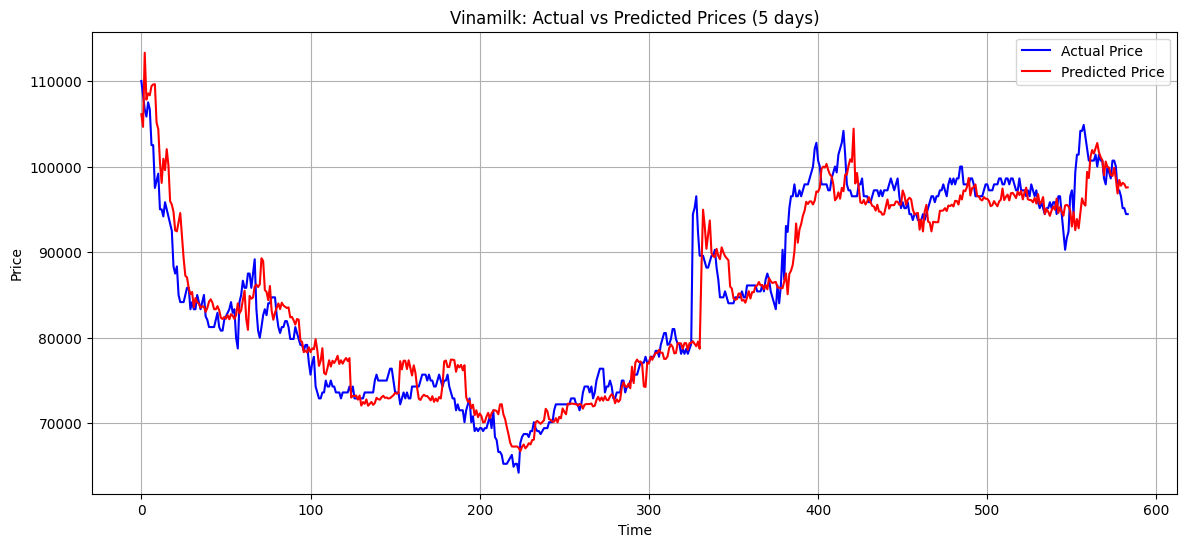

In [34]:
tralalelo(vnm, 'Vinamilk')